In [1]:

from cv2 import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import statistics
from PIL import Image

In [96]:
image = cv2.imread("/home/pruthvirg/seg_image.png")

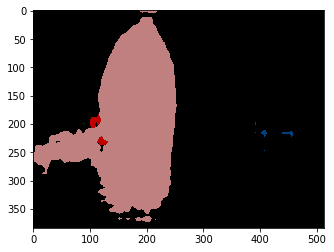

In [98]:
H,W,C = image.shape

384

In [100]:
image_prime = np.empty((H,W))

array([0, 0, 0], dtype=uint8)

In [102]:
for i in range(H):
    for j in range(W):
        if image[i][j][0] == 192 and image[i][j][1] == 128 and image[i][j][2] == 128:
            image_prime[i][j] = 1
        else:
            image_prime[i][j]= 0

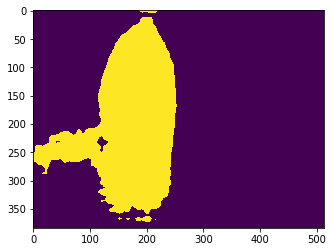

In [104]:
image_prime = cv2.erode(image_prime, None, iterations=6)

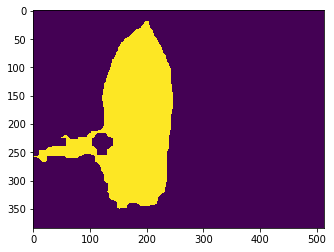

In [106]:
H,W = image_prime.shape

In [107]:
img = Image.fromarray(image_prime, 'L')

0.0

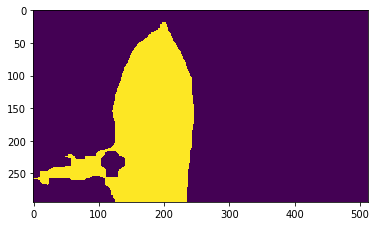

In [110]:
contour_list_simple = []
def get_contour(img):
    a=[]
    H,W = img.shape
    for i in range(H-90):
        for j in range(W):
            if img[i][512-j] == 1.0:
                a.append([i,512-j])
                contour_list_simple.append(512-j)
                break
    return a
            

In [111]:
image_contour = get_contour(image_prime)

[[19, 203],
 [20, 203],
 [21, 203],
 [22, 204],
 [23, 204],
 [24, 204],
 [25, 204],
 [26, 205],
 [27, 205],
 [28, 205],
 [29, 205],
 [30, 205],
 [31, 206],
 [32, 207],
 [33, 208],
 [34, 209],
 [35, 210],
 [36, 210],
 [37, 211],
 [38, 211],
 [39, 211],
 [40, 212],
 [41, 212],
 [42, 212],
 [43, 213],
 [44, 213],
 [45, 214],
 [46, 214],
 [47, 215],
 [48, 215],
 [49, 216],
 [50, 217],
 [51, 218],
 [52, 218],
 [53, 219],
 [54, 219],
 [55, 220],
 [56, 220],
 [57, 221],
 [58, 221],
 [59, 222],
 [60, 223],
 [61, 223],
 [62, 224],
 [63, 225],
 [64, 225],
 [65, 226],
 [66, 226],
 [67, 226],
 [68, 227],
 [69, 227],
 [70, 227],
 [71, 228],
 [72, 228],
 [73, 229],
 [74, 229],
 [75, 230],
 [76, 230],
 [77, 231],
 [78, 232],
 [79, 232],
 [80, 233],
 [81, 233],
 [82, 234],
 [83, 234],
 [84, 234],
 [85, 234],
 [86, 235],
 [87, 235],
 [88, 235],
 [89, 235],
 [90, 236],
 [91, 236],
 [92, 237],
 [93, 237],
 [94, 238],
 [95, 238],
 [96, 238],
 [97, 239],
 [98, 239],
 [99, 240],
 [100, 240],
 [101, 241],
 [

In [113]:
ext_top = image_contour[0]

[19, 203]

In [115]:
flag = 0
for i in range(len(image_contour)):
    if image_contour[i][1] > flag :
        flag = image_contour[i][1]
        ext_left = image_contour[i]
    

[144, 245]

In [117]:
left_length = ext_left[1]

245

[203,
 203,
 203,
 204,
 204,
 204,
 204,
 205,
 205,
 205,
 205,
 205,
 206,
 207,
 208,
 209,
 210,
 210,
 211,
 211,
 211,
 212,
 212,
 212,
 213,
 213,
 214,
 214,
 215,
 215,
 216,
 217,
 218,
 218,
 219,
 219,
 220,
 220,
 221,
 221,
 222,
 223,
 223,
 224,
 225,
 225,
 226,
 226,
 226,
 227,
 227,
 227,
 228,
 228,
 229,
 229,
 230,
 230,
 231,
 232,
 232,
 233,
 233,
 234,
 234,
 234,
 234,
 235,
 235,
 235,
 235,
 236,
 236,
 237,
 237,
 238,
 238,
 238,
 239,
 239,
 240,
 240,
 241,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 242,
 243,
 243,
 243,
 243,
 243,
 243,
 243,
 243,
 243,
 243,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 245,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 244,
 243,
 243,
 243

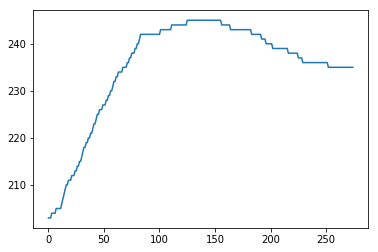

In [121]:
neck_keypoint=[150,250]
neck_keypoint[0] =ext_top[0]+50

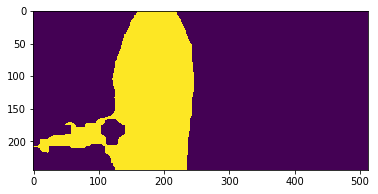

In [126]:
square_sum = 0
for i in contour_list_simple[neck_keypoint[0]-ext_top[0]:]:
    square_sum = square_sum + (i-left_length)*(i-left_length)
    
back_lenght = len(contour_list_simple)
print(square_sum/(back_lenght))

37.92


In [129]:
if (square_sum/(back_lenght)) > 500:
    x= 0
    print("Back is not straight")
else:
    x=  1
    print("Back is straight")

1